<a href="https://colab.research.google.com/github/2015samtaylor/Data_Sci/blob/main/CP_AMZN_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title AMZN SHIPPING

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive', force_remount= False)
%cd /content/drive/My Drive/CP_AMZN_Pricing

df_2 = pd.read_csv('Custom Planet Invoice file 4.11.22.csv')
packages = pd.read_csv('Amazon Shipping Prices - package.csv')
flats = pd.read_csv('Amazon Shipping Prices - flats.csv')

dic = {'envelope' : 'flats', 'box' : 'package'}
df_2['type'] = df_2['type'].replace(dic)


df_2[' Shipping Charge '] = (df_2[' Shipping Charge '].str.replace('$', '', regex = True)).astype(float)

compare = []

list_len = len(df_2)
i = 0
while i < list_len:
    
    ship, weight_type, charge_weight, zone = df_2.iloc[i][['type', 'Weight Type', 'Charge Weight', 'Zone']]

    if ship == 'flats':
        x = flats
    else:
        x = packages

    output = x.loc[(x['Weight'] == charge_weight) & (x['oz or lb'] == weight_type )]
    o = list(output['Zone ' + str(zone)])
    compare.append(o)

    i += 1 

o = pd.DataFrame(compare, columns = ['Shipping Rate Table'])  
final = pd.concat([df_2, o], axis = 1)
final['Validity'] = final[' Shipping Charge '] - final['Shipping Rate Table']
final.rename(columns = {' Shipping Charge ': 'Transport Works Bill'}, inplace = True)

z = (final['Validity'] == 0.00).value_counts()
new_index = ['Losing Money Shipping', 'Accurate']
z = z.to_frame().reset_index()
values = ['Accurate', 'Losing Money']
z['index'] = values
z = z.set_index('index')

errors = final.loc[(final['Validity'] != 0.00)]
no_errors = final.loc[(final['Validity'] == 0.00)]
AMZN_greater = final.loc[(final['Validity'] > 0.00)]
len(AMZN_greater)


print('\n\n----The number of instances where transport works billed more than rate table : ', len(AMZN_greater), 'out of ', len(final), ' orders---')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/CP_AMZN_Pricing


----The number of instances where transport works billed more than rate table :  0 out of  2359  orders---


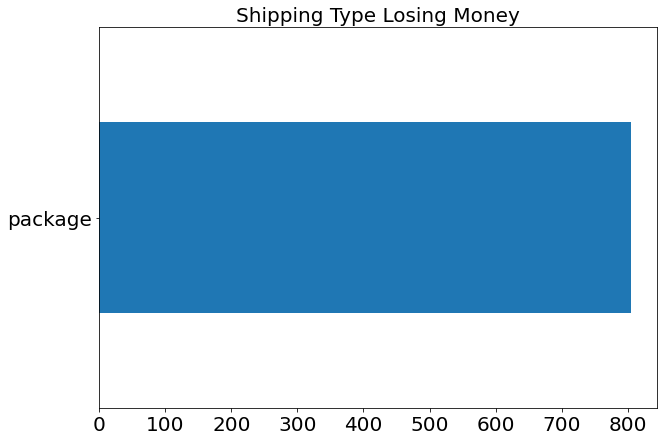

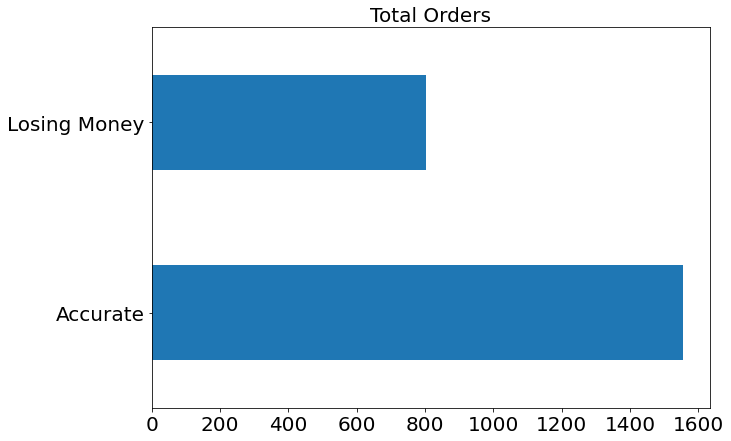

In [ ]:
#@title Where Shipping is Losing Money 


errors = final.loc[(final['Validity'] != 0.00)]
no_errors = final.loc[(final['Validity'] == 0.00)]
errors['type'].value_counts()[:].plot(kind = 'barh')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.title('Shipping Type Losing Money', fontsize = 20)
plt.ylabel('', fontsize= 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)


z.plot(kind = 'barh',legend = False)
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.title('Total Orders', fontsize = 20)
plt.ylabel('', fontsize= 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20);

In [ ]:
#@title EXPORTING FILES TO DRIVE

errors.to_csv('/content/drive/My Drive/CP_AMZN_Pricing/shipping_inaccuracies.csv', index = False, )
# no_errors

# final